# Unit Test #1
Topics Covered:
* Simple Linear Regression
* Multiple Regression
* Regression Assumptions

## Background
The Global Health Observatory (GHO) data repository under the World Health Organization (WHO) tracks health status and other related factors for all countries. This dataset is related to life expectancy and associated health factors for 193 countries, aggregated from the WHO, and corresponding economic data was collected from the United Nation website. This data spans the years of 2000 to 2015.

**Dataset**

`Life Expectancy Data.csv`

## Task
You've been tasked with answering a few questions that could highlight key factors in increasing life expectancy within a country. The following questions are meant to be a guide for your study but it is up to you to provide full support of your answer (i.e. ensure assumptions are met, explain when they can't be, interpret coefficients). All answers should be provided in the notebook with associated code.

**Question**

What can be said about the relationship between some of these predictor variables and `Life Expectancy`? Note: `Life Expectancy` should be your response variable.

**Bonus** 

What's the highest Adjusted $R^2$ you can achieve? Would this model work well on new data?

# Importing, preparation, and cleaning

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metric
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Cleaning
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True).str.lower()
df.dropna(inplace=True)

In [6]:
df_column_names = []
for column in df.columns:
    df_column_names.append(column)
print(df_column_names)

['country', 'year', 'status', 'life expectancy', 'adult mortality', 'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years', 'thinness 5-9 years', 'income composition of resources', 'schooling']


In [7]:
lifeExpec = 'life expectancy'

#####
# Simple Linear Regression
## Evaluation

#### 1. Schooling: 
Of all the predictors examined, schooling has the highest R-squared value of 0.529 and F-statistic of 1853.0. This indicates that schooling explains about 52.9% of the variance in life expectancy, showing it has a strong fit.
* *Linearity:* The relationship between schooling and life expectancy appears to be linear based on residuals vs fitted values.
* *Homoscedasticity:* The residuals show consistent variance, indicating homoscedasticity.
* *Independence:* There is some autocorrelation, suggesting a slight lack of independence.
* *Normality:* The residuals are fairly normally distributed, though with some deviation.

**Model performance:** With an R-squared value of 0.529, schooling is a strong predictor of life expectancy. The high F-statistic (1853.0) and a low p-value indicate that the model is highly significant.

#### 2. Square Root BMI:
This predictor has an R-squared value of 0.235 and F-statistic of 506.2, indicating that it explains 23.5% of the variance in life expectancy.
* *Linearity:* The relationship between square root BMI and life expectancy seems to be linear.
* *Homoscedasticity:* The residuals show constant variance, indicating homoscedasticity.
* *Independence:* The residuals are relatively independent compared to other models.
* *Normality:* The residuals are very normally distributed, which shows the reliability of the model.

**Model performance:** The R-squared value (0.235) and F-statistic (506.2) show that square root BMI is a significant predictor of life expectancy, albeit not as strong as schooling. The model's assumptions are well met.

#### 3. Log Alcohol:
Despite having a lower R-squared value and F-statistic, the model meets its assumptions well.
* *Linearity:* The relationship between log alcohol and life expectancy appears to be linear.
* *Homoscedasticity:* The residuals show constant variance.
* *Independence:* The residuals relatively independent.
* *Normality:* The residuals are normally distributed, explaining the model's reliability.

**Model performance:** The lower R-squared and F-statistic suggest that log alcohol is a weaker predictor of life expectancy compared to schooling and square root BMI. However, the model meets its assumptions well, making it a reliable, though less powerful predictor.

## Takeaway for stakeholders
* Schooling is the strongest predictor of life expectancy among those tested. An increase in average years of schooling significantly increases life expectancy, likely due to better awareness of well-being and health practices.
* BMI, specifically its square root, is also a significant predictor. Maintaining a healthy BMI can positively impact life expectancy.
* Although alcohol consumption (log-transformed) is a less powerful predictor, it is still important. Managing alcohol intake can contribute to a longer life expectancy.

Each of these factors play a significant role in predicting life expectancy. Focusing on education and health awareness can have substantial effects on a country's average life expectancy.

####

In [8]:
# Transformations for linearity and homoscedasticity
df['log alcohol'] = np.log(df['alcohol'] + 1)
df['square root bmi'] = np.sqrt(df['bmi'])

# Handling autocorrelation
df['lagged alcohol'] = df['alcohol'].shift(1)

Regression results for schooling:
                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1853.
Date:                Fri, 31 May 2024   Prob (F-statistic):          6.69e-272
Time:                        15:33:39   Log-Likelihood:                -5303.4
No. Observations:                1649   AIC:                         1.061e+04
Df Residuals:                    1647   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5

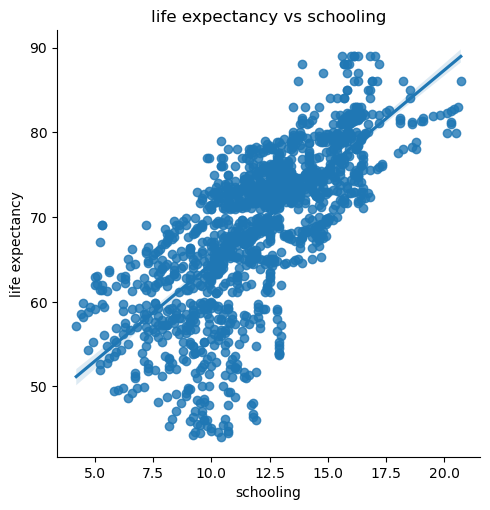

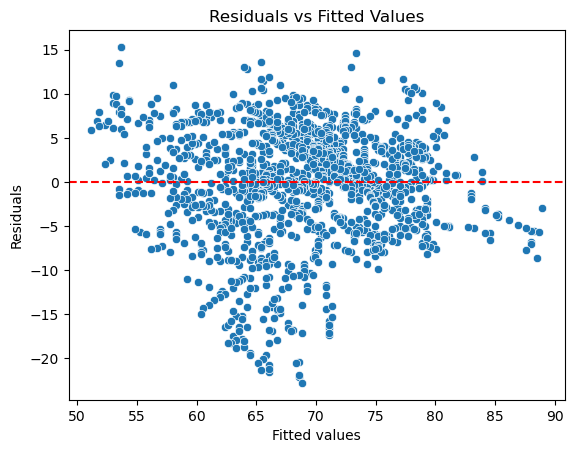

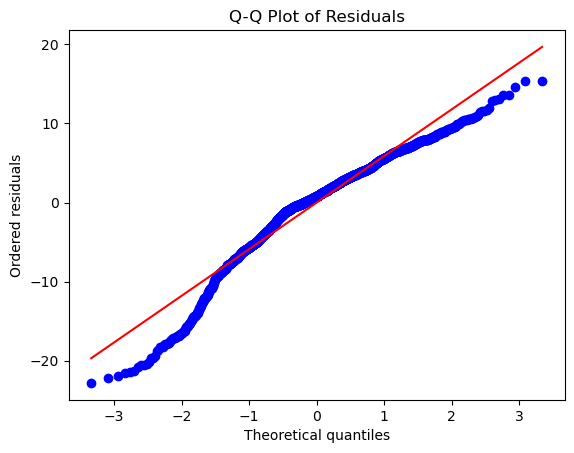

Regression results for log alcohol:
                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     275.3
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.77e-57
Time:                        15:33:40   Log-Likelihood:                -5797.5
No. Observations:                1649   AIC:                         1.160e+04
Df Residuals:                    1647   BIC:                         1.161e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         

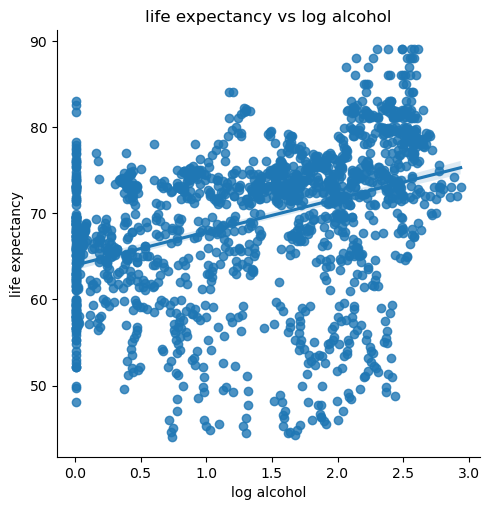

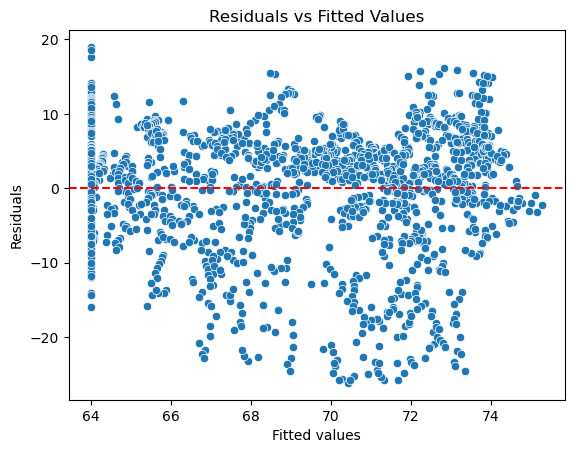

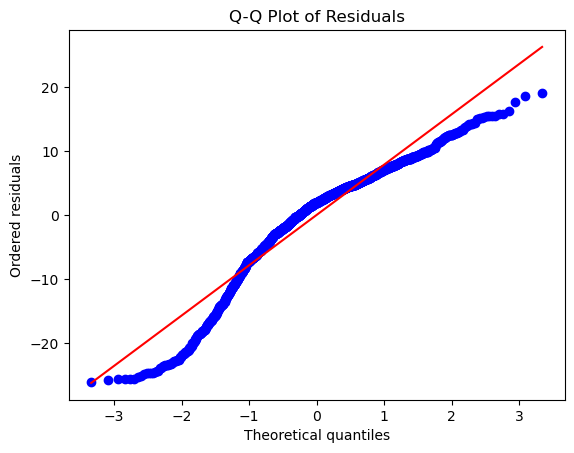

Regression results for square root bmi:
                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     506.8
Date:                Fri, 31 May 2024   Prob (F-statistic):           4.57e-98
Time:                        15:33:40   Log-Likelihood:                -5703.7
No. Observations:                1649   AIC:                         1.141e+04
Df Residuals:                    1647   BIC:                         1.142e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

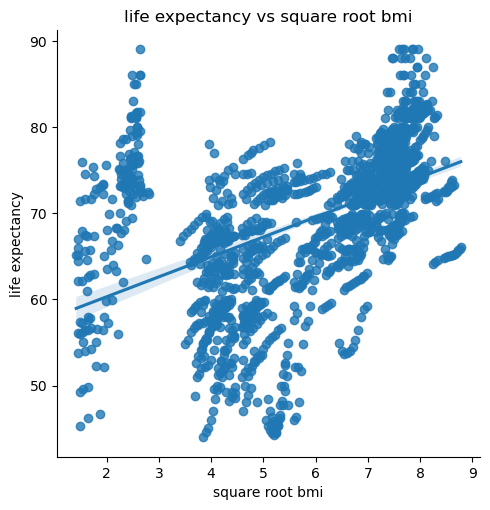

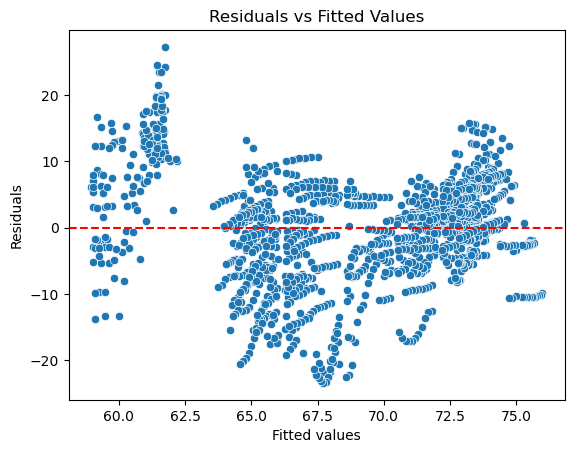

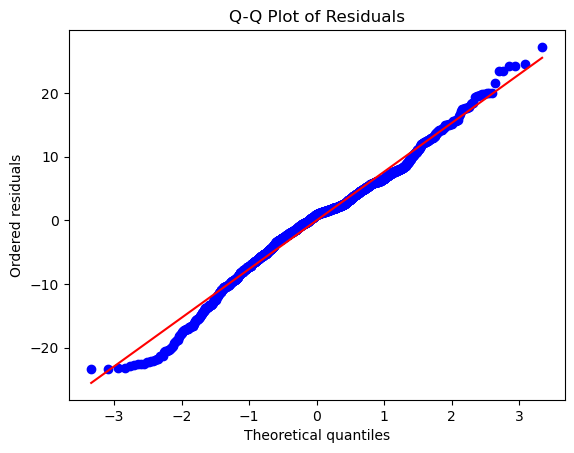

In [9]:
# old_predictors = ['adult mortality', 'alcohol', 'bmi', 'gdp', 'schooling', 'log alcohol', 'square root bmi', 'lagged alcohol']
predictors = ['schooling', 'log alcohol', 'square root bmi']
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=predictors + [lifeExpec])

# Simple Linear Regression for each predictor
for predictor in predictors:
    x = df[[predictor]]
    y = df[[lifeExpec]]
    x = sm.add_constant(x)  # Adds a constant term to the predictor
    
    # Runs the model
    model = sm.OLS(y, x).fit()
    print(f'Regression results for {predictor}:')
    print(model.summary())

    # Plots the relationship
    sns.lmplot(x=predictor, y=lifeExpec, data=df)
    plt.title(f'{lifeExpec} vs {predictor}')
    plt.show()
    
    # Set residuals value for model assumption checks
    residuals = model.resid
    
    # Residual plot for homoscedasticity and linearity check
    sns.scatterplot(x=model.fittedvalues, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()
    
    # Q-Q plot for normality check
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered residuals')
    plt.show()


#####
# Multiple Regression

## Evaluation
After taking account for multicollinear and nonsignificant variables, which can disturb the model's ability to predict on new data, I found that the following variables are important factors in improving life expectancy.
Model perfomance: $R^2$ ~ 0.73, meaning about 73% of variance in life expectancy can be explained by the model and it's variables below. The f-statistic is ~ 544.1, and the f-test is near 0, meaning the model is highly significant, and capable of predicting accurately.

* Constant (Intercept): 53.9234 || When all other factors are zero, the baseline life expectancy is about 54 years old.
* Adult Mortality: -0.032  ||  For every increase in adult mortality (per 1000 people), life expectancy decreases by about 0.032 years.
* Under-Five Deaths: -0.002  ||  For every increase in under-five deaths (per 1000 children), life expectancy decreases by about 0.002 years
* Diphtheria Immunization: 0.028  ||  For every increase in diphtheria immunization coverage (in percentage points), life expectancy increases by about 0.028 years.
* GDP: 5.889e-05  ||  For every increase in GDP (per capita), life expectancy increases by about 0.0000589 years (or about 0.00589 years per $1000 increase in GDP).
* Schooling: 1.3221  ||  For every additional year of schooling on average, life expectancy increases by about 1.322 years.
* Square Root BMI: 0.4676  ||  For every increase in the square root of BMI, life expectancy increases by about 0.468 years.
* Developing Status: -0.8842  ||  Being in a developing country is associated with a lower life expectancy compared to developed countries by about 0.884 years.

## Assumption Notes
1. Linearity: Looking at residuals vs fitted values, we can see there are no clear clusters or patterns, and values are generally plotted randomly along 0. Some outliers are seen, but nothing too bad. It is very linear. 
2. Homoscedasticity: Examining residuals vs fitted values, we can again see there is no systematic increase/decrease or spread in the values. They are generally random. The model is generally homoscedastic.
3. Independence: Using the Durbin-Watson Statistic of 2.062, we can safely say independence is met as values between 1.5 and 2.5 are generally safe. 
4. Normality of Residuals: Using a Q-Q plot, we can see that normality is overall pretty good and well-maintained. Some irregularites are seen that suggest non-normality, which may be due to the outliers in the residuals.
5. Multicollinearity: Checking the VIF levels of the model, we can see that all features have a VIF value well below 10, in fact, all below 2. Multicollinearity is not present in the model. 

## Takeaway for stakeholders
Although a lot of these are less than 1, when they are all taken into account, they can cause life expectancy to drop several years. Specifically, Schooling and the amount of education received helps increase life expectancy greatly, likely due to the understanding of how things can affect our well-being. On that note, a greater understanding of individuals BMI and its importance can help increase life expectancy by almost a year. Finally, developing countries have about a year less life expectancy than developed countries, so increasing GDP and a nation's well-being can really improve life expectancy on multiple fronts. 

####

In [10]:
# drop measles, infant deaths, hepatitis b, polio, hiv/aids, thinness 1-19 years, thinnes 5-9 years, income composition of resources, 

In [11]:
# Check correlation matrix to remove multicollinearity (where values are more than 0.5 between IVs)
df_corr = df.drop(['measles', 'infant deaths', 'hepatitis b', 'polio', 'hiv/aids', 'thinness 1-19 years', 'thinness 5-9 years', 'income composition of resources', 'percentage expenditure', 'population','bmi', 'lagged alcohol','alcohol'], axis=1)
cor_matrix = df_corr.corr()
cor_matrix.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1)

,year,life expectancy,adult mortality,under-five deaths,total expenditure,diphtheria,gdp,schooling,log alcohol,square root bmi
year,1.000000,0.050771,-0.037092,0.010479,0.059493,0.029641,0.096421,0.088732,-0.182104,-0.006443
life expectancy,0.050771,1.000000,-0.702523,-0.192265,0.174718,0.341331,0.441322,0.727630,0.378409,0.485081
adult mortality,-0.037092,-0.702523,1.000000,0.060365,-0.085227,-0.191429,-0.255035,-0.421171,-0.156334,-0.307561
under-five deaths,0.010479,-0.192265,0.060365,1.000000,-0.145803,-0.178448,-0.100331,-0.226013,-0.093145,-0.224992
total expenditure,0.059493,0.174718,-0.085227,-0.145803,1.000000,0.129915,0.180373,0.243783,0.225222,0.164129
diphtheria,0.029641,0.341331,-0.191429,-0.178448,0.129915,1.000000,0.158438,0.350398,0.242731,0.158525
gdp,0.096421,0.441322,-0.255035,-0.100331,0.180373,0.158438,1.000000,0.467947,0.367485,0.228637
schooling,0.088732,0.727630,-0.421171,-0.226013,0.243783,0.350398,0.467947,1.000000,0.577468,0.491010
log alcohol,-0.182104,0.378409,-0.156334,-0.093145,0.225222,0.242731,0.367485,0.577468,1.000000,0.311700
square root bmi,-0.006443,0.485081,-0.307561,-0.224992,0.164129,0.158525,0.228637,0.491010,0.311700,1.000000


In [12]:
# Drop multicollinear variables to create the test and training sets
x = df.drop(['life expectancy', 'country', 'measles', 'infant deaths', 'hepatitis b', 'polio', 'hiv/aids', 'thinness 1-19 years', 'thinness 5-9 years', 'income composition of resources', 'percentage expenditure', 'population','bmi', 'lagged alcohol','alcohol'], axis=1)
x = pd.get_dummies(data = x, drop_first = True)

In [13]:
# Set DV
y = df[[lifeExpec]]

In [14]:
# Create test and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [15]:
# Add constant to training set, and sets the training model with ols
x_train_sm = sm.add_constant(x_train)
train_model = sm.OLS(y_train, x_train_sm).fit()
print(train_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     381.8
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        15:33:41   Log-Likelihood:                -3850.3
No. Observations:                1319   AIC:                             7723.
Df Residuals:                    1308   BIC:                             7780.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               136.5291     64.28

In [16]:
# Remove nonsignificant variables from training set and runs again
x_train_sm = x_train_sm.drop(['year', 'total expenditure', 'log alcohol'], axis=1)
train_model = sm.OLS(y_train, x_train_sm).fit()
print(train_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     544.1
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        15:33:41   Log-Likelihood:                -3852.6
No. Observations:                1319   AIC:                             7721.
Df Residuals:                    1311   BIC:                             7763.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.9234      1.06

In [17]:
# Create the test and final version of the model for testing on new data
test_model = LinearRegression()
test_model.fit(x_train_sm, y_train)

x_test = x_test.drop(['year', 'total expenditure', 'log alcohol'], axis=1)
x_test_sm = sm.add_constant(x_test)

# Set predictions using the model
predictions = test_model.predict(x_test_sm)

In [18]:
# Check the MSE, R2, and RMSE to see how the predictions did on the model
print("MSE =", round(metric.mean_squared_error(y_test, predictions), 2))
print("R2 =", round(metric.r2_score(y_test, predictions), 2))
print("RMSE = ", np.sqrt(round(metric.mean_squared_error(y_test, predictions), 2)))

MSE = 19.38
R2 = 0.73
RMSE =  4.402272140611028


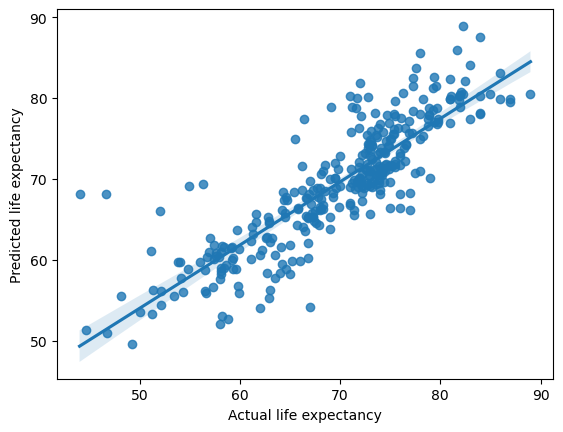

In [19]:
# Plot the model performance (predictions vs actual)
sns.regplot(x = y_test, y = predictions)
plt.ylabel("Predicted life expectancy")
plt.xlabel("Actual life expectancy")
plt.show()

1. Linearity and Homoscedasticity


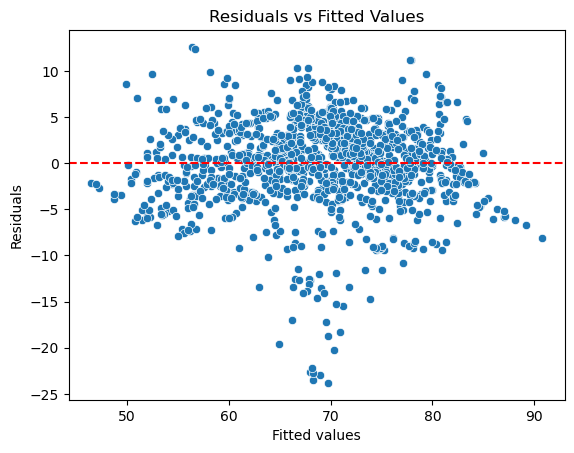

2. Independence
Durbin-Watson Statistic: 2.062140364434642

3. Normality of Residuals


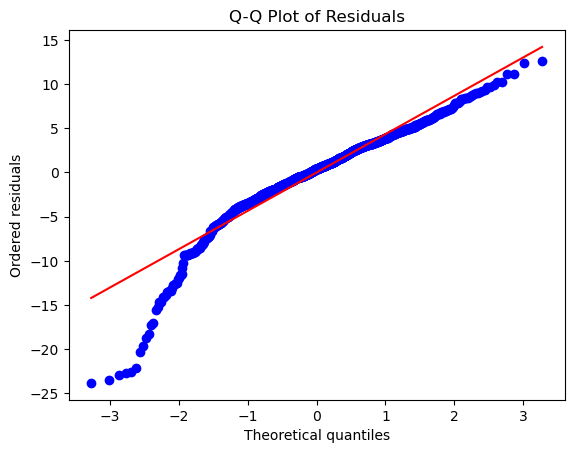

4. Multicollinearity
             feature        VIF
0              const  73.297016
1    adult mortality   1.230141
2  under-five deaths   1.092401
3         diphtheria   1.147715
4                gdp   1.430054
5          schooling   1.993594
6    square root bmi   1.349672
7  status_Developing   1.520563


In [20]:
# 1. Linearity and Homoscedasticity
# Residual Plot
residuals = train_model.resid
sns.scatterplot(x=train_model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
print('1. Linearity and Homoscedasticity')
plt.show()

# 2. Independence
# Durbin-Watson Test
dw_test = sm.stats.stattools.durbin_watson(train_model.resid)
print('2. Independence')
print(f'Durbin-Watson Statistic: {dw_test}\n')

# 3. Normality of Residuals
# Q-Q Plot
stats.probplot(train_model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered residuals')
print('3. Normality of Residuals')
plt.show()

# 4. Multicollinearity
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
print('4. Multicollinearity')
print(vif_data)